# Exercise 1 b)

## Function we want to minimize

$f(x) = x_1^2 + x_2^2 + 16x_3^2$ 

## subject to the constraint

$h(x) = x_1x_2 - 1$

# Let's define the merit function

## pure
- $p(x) = \frac{1}{2}h(x)^Th(x) = ||h(x)||_2^2 = \frac{1}{2}(x_1x_2 - 1)^T (x_1x_2 - 1)$

$P(x,\mu) = f(x) + \mu p(x) =  x_1^2 + x_2^2 + 16x_3^2 + \frac{\mu}{2}(x_1x_2 - 1)^T (x_1x_2 - 1)$

## Augmented Lagrangian

$
\begin{equation}
\begin{aligned}
L(x,\lambda,\mu) &= f(x) + \lambda^Th(x) + \frac{\mu}{2}h(x)^Th(x) \\
&= x_1^2 + x_2^2 + 16x_3^2 + \lambda^T(x_1x_2 - 1) + \frac{\mu}{2} (x_1x_2 - 1)^T (x_1x_2 - 1)
\end{aligned}
\end{equation}
$

# Algorithms

## pure

1. For $k=0$ choose: $\mu_0, x_0$
2. $x_{k+1}$ = $argmin_x$ $P(x, \mu_k)$
3. Choose $\mu_{k+1} > \mu_k$, $k=k+1$, repeat step 2.

## Augmented Lagrangian

1. For $k=0$, choose: $\lambda_0, x_0, \mu_0$
2. $x_{k+1}$ = $argmin_x$ $L(x,\lambda_k, \mu_k)$
3. $\lambda_k$


# Roadmap

- [x] Find optimization algorithm from scipy
2. Create naive optimization loop for pure method (no visualizations, no keeping track of metrics) [ ]
3. Once that is done, start recording certain metrics (nº iterations, $f(x_k)$, $P(x,\mu)$, $\mu$ ) [ ]
4. Repeat 2,3 for Augmented Lagrangian [ ]



In [2]:
# optimization algorithm to minimize unconstrained function
from scipy.optimize import minimize
import pandas as pd
import numpy as np
import matplotlib as plt

In [3]:
# function to minimize
f = lambda x: x[0]**2 + 4*x[1]**2 + 16*x[2]**2
# its gradient/jacobian
JacF = lambda x: [2*x[0], 8*x[1], 32*x[2]]
# norm of its gradient/jacobian
normJacF = lambda x: np.linalg.norm(JacF(x))
# constraint
h = lambda x: x[0] * x[1] - 1

## Penalty Method

In [4]:
# feasibility penalization function
p = lambda x: 1/2 * h(x)**2
# Merit function
P = lambda mu: lambda x: f(x) + mu*p(x)
JacP = lambda mu: lambda x: np.array([2*x[0] + mu*(x[0]*x[1]**2 -x[1]), 2*x[1] + mu*(x[1]*x[0]**2 -x[0]), 32*x[2]])

In [5]:
from scipy.optimize import newton

In [6]:
data = pd.DataFrame(columns=['iteration','x', 'f(x)',"||f'(x)||",'P(x)','p(x)','h(x)','mu']).set_index('iteration')
# initial condition
i=0 # iteration
x = [20,30,15]
mu = 5
data.loc[i] = [x,f(x),normJacF(x),P(mu)(x),p(x),h(x),mu]
data

,x,f(x),||f'(x)||,P(x),p(x),h(x),mu
iteration,,,,,,,
0,"[20, 30, 15]",7600,538.144962,904602.5,179400.5,599,5


In [16]:
# start optimization loop
# Run this cell again to get more iterates
i += 1 
result = newton(JacP(mu), x, maxiter=100,disp=False)
x = result
data.loc[i] = [x, f(x), normJacF(x), P(mu)(x), p(x), h(x), mu]
mu *= 2
data

,x,f(x),||f'(x)||,P(x),p(x),h(x),mu
iteration,,,,,,,
0,"[20, 30, 15]",7600,538.144962,904602.500000,1.794005e+05,599,5
1,"[0.7745965758579659, 0.7745966894717782, 0.0]",3,6.387488,3.400000,8.000002e-02,-0.4,5
2,"[0.8944271810598781, 0.8944272009362743, 0.0]",4,7.375636,4.200000,2.000000e-02,-0.2,10
3,"[0.9486832924325858, 0.9486833036686406, 0.0]",4.5,7.823043,4.600000,5.000000e-03,-0.1,20
4,"[0.9746794301454881, 0.9746794388177985, 0.0]",4.75,8.037413,4.800000,1.250000e-03,-0.05,40
5,"[0.987420878974835, 0.9874208868383483, 0.0]",4.875,8.142481,4.900000,3.125000e-04,-0.025,80
6,"[0.993730341969704, 0.993730349465483, 0.0]",4.9375,8.194510,4.950000,7.812500e-05,-0.0125,160
7,"[0.9968700982087001, 0.9968701055290038, 0.0]",4.96875,8.220401,4.975000,1.953125e-05,-0.00625,320
8,"[0.9984362737570897, 0.9984362810144017, 0.0]",4.98438,8.233316,4.987500,4.882813e-06,-0.003125,640


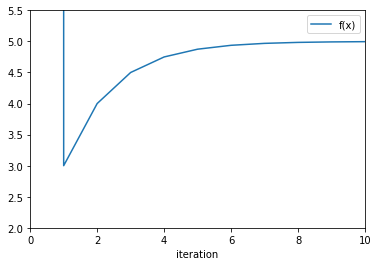

In [18]:
data.plot(y='f(x)', use_index=True,ylim=(2,5.5))

x seems to be converging to something around (1,1,0)

## Augmented Lagrangian Method

In [41]:
# feasibility penalization function
p = lambda x: 1/2 * h(x)**2
# Merit function
L = lambda mu,lamb: lambda x: f(x) + lamb*h(x) + mu*p(x)
JacL = lambda mu,lamb: lambda x: np.array([2*x[0] + (lamb*x[1]) + mu*(x[0]*x[1]**2 -x[1]), 
                                           8*x[1] + (lamb*x[0]) + mu*(x[1]*x[0]**2 -x[0]), 32*x[2]])

In [42]:
dataAug = pd.DataFrame(columns=['iteration','x', 'f(x)',"||f'(x)||",'L(x)','p(x)','h(x)','mu','lambda']).set_index('iteration')
# initial condition
j=0 # iteration
w = [20,30,15]
mu = 5
lamb = 2
dataAug.loc[j] = [w,f(w),normJacF(w),L(mu,lamb)(w),p(w),h(w),mu,lamb]
dataAug

,x,f(x),||f'(x)||,L(x),p(x),h(x),mu,lambda
iteration,,,,,,,,
0,"[20, 30, 15]",7600,538.144962,905800.5,179400.5,599,5,2


In [54]:
# start optimization loop
# Run this cell again to get more iterates
j += 1 
res = newton(JacL(mu,lamb), w, maxiter=100,disp=False)
w = res
dataAug.loc[j] = [w, f(w), normJacF(w), L(mu,lamb)(w), p(w), h(w), mu, lamb]
mu *= 2
lamb = lamb + mu * h(w)
dataAug

,x,f(x),||f'(x)||,L(x),p(x),h(x),mu,lambda
iteration,,,,,,,,
0,"[20, 30, 15]",7600,538.144962,905800.500000,1.794005e+05,599,5,2
1,"[7.831090399206106e-05, 2.9343524655459706e-05...",9.57677e-09,0.000282,0.500000,5.000000e-01,-1,5,2
2,"[1.6733223466887854, 0.8366577374220563, 0.0]",5.59999,7.483300,3.200000,7.999924e-02,0.399998,10,-8
3,"[1.264912992829711, 0.6324561618888903, 0.0]",3.20001,5.656860,3.600008,1.999960e-02,-0.199998,20,-3.82059e-05
4,"[1.48318964705647, 0.741641053401045, 0.0]",4.39998,6.633357,3.800004,4.999433e-03,0.0999943,40,-7.99996
5,"[1.3789014148931993, 0.688937891172743, 0.0]",3.79991,6.162965,3.900022,1.251129e-03,-0.0500226,80,-0.000410964
6,"[1.4302450589566624, 0.7167132917103823, 0.0]",4.10031,6.407635,3.949910,3.143940e-04,0.0250756,160,-8.00402
7,"[1.4065824354094356, 0.70200186310791, 0.0]",3.9497,6.281204,3.974754,7.908430e-05,-0.0125765,320,0.0201844
8,"[1.4180118808967042, 0.7096531388588561, 0.0]",4.02519,6.346173,3.987321,1.982347e-05,0.00629658,640,-8.02878


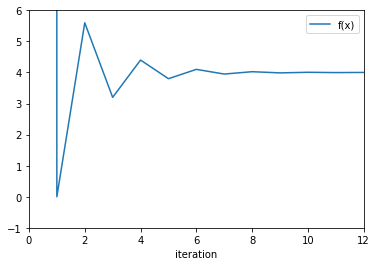

In [56]:
dataAug.plot(y='f(x)', use_index=True,ylim=(-1,6))